<a href="https://colab.research.google.com/github/melissaleon2006-dot/fabricacion-inteligente.1/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset de trabajo

# Conjunto de Datos de Fabricación Inteligente para Optimización Predictiva
1) **¿Qué estamos analizando?**

Trabajaremos con un conjunto de datos de fabricación inteligente que simula el funcionamiento de máquinas industriales modernas conectadas mediante sensores IoT y redes de comunicación avanzadas (6G).
:
El dataset representa un entorno de industria 4.0, donde las máquinas:


*   Operan de forma continua
*   Generan datos en tiempo casi real
*   Están conectadas a una red inteligente que influye en su explaincia y eficiencia.


El objetivo general es analizar el comportamiento del sistema productivo a partir de datos de sensores, comunicación y rendimiento.


---


2) **¿Qué es una “anomalía” en este contexto?**

En este dataset, una anomalía es una condición en la que el sistema se desvía de su operación eficiente esperada.
Esto puede ocurrir cuando:

* La temperatura o vibración supera valores normales.

*  El consumo energético es excesivo.

*  La latencia o pérdida de paquetes en la red aumenta.

*  La tasa de defectos se incrementa.

*Nota importante:*
Aquí no hablamos de una falla puntual mecánica, sino de una degradación del rendimiento del sistema de fabricación, que puede anticipar problemas futuros.


---


**3) ¿Qué tipo de variables contiene el dataset?**

El conjunto de datos integra tres grandes grupos de variables, lo que lo hace especialmente rico para análisis predictivo:

* Variables físicas (sensores IoT)

* Temperatura

* Vibración

*  Consumo de energía

*Otros parámetros de condición de máquina*

Estas variables reflejan el estado físico de los equipos industriales.

* Variables de comunicación (red 6G)

*  Latencia

*  Pérdida de paquetes

* Eficiencia de la comunicación

Estas métricas representan el impacto de la segmentación de red 6G sobre la operación industrial.

 **Variables de producción**

* Tasa de defectos

* Tasa de error

* Puntuación de mantenimiento predictivo

Estas variables miden el desempeño global del proceso productivo.


---



**4) ¿Qué es la columna Efficiency_Status?**

La columna Efficiency_Status es la variable objetivo **(target)** del dataset.

Clasifica la eficiencia del sistema de fabricación en tres estados:

🟢 Alta eficiencia

🟡 Eficiencia media

🔴 Baja eficiencia

Esta clasificación se obtiene a partir de:

el estado de los sensores, el rendimiento de la red, y los indicadores de producción.

💡 En términos prácticos, esta columna permite:

detección de estados fuera de rango, entrenamiento de modelos predictivos,evaluación de la salud del sistema industrial.


---



5) **¿Por qué este dataset es realista para la industria?**

Aunque los datos son simulados, siguen patrones reales de operación industrial, por lo que es normal encontrar:

valores estables durante periodos normales, pequeñas fluctuaciones constantes,
picos ocasionales por carga, red o demanda, correlaciones entre variables físicas, red y producción.

Esto refleja cómo funcionan realmente los sistemas industriales conectados, donde el rendimiento no depende solo de la máquina, sino también de la comunicación y la gestión de recursos.


---



**6) ¿Qué tipo de problemas se pueden estudiar con este dataset?**

Este conjunto de datos permite analizar problemas clave de la manufactura moderna, como:

* Detección temprana de anomalías

* Mantenimiento predictivo

* Optimización de la eficiencia productiva

* Impacto de la red 6G en sistemas industriales

* Entrenamiento de modelos de IA y Deep Learning

Es especialmente útil para estudios donde se combinan ingeniería, datos y comunicación avanzada.

**El objetivo final** es entender cómo la interacción entre máquinas, sensores y red afecta la eficiencia de la fabricación inteligente.

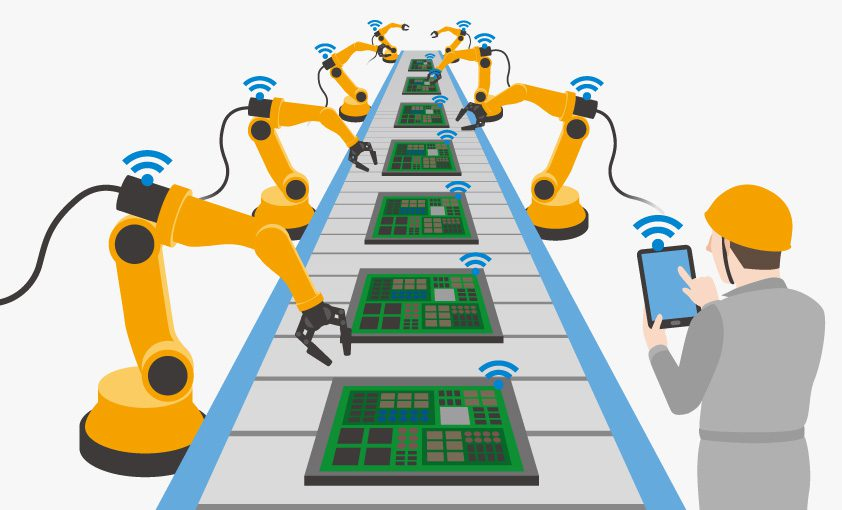


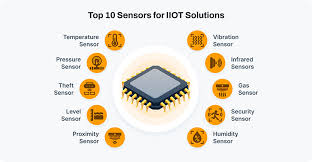

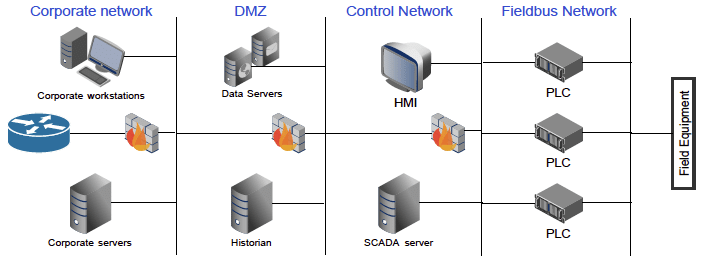
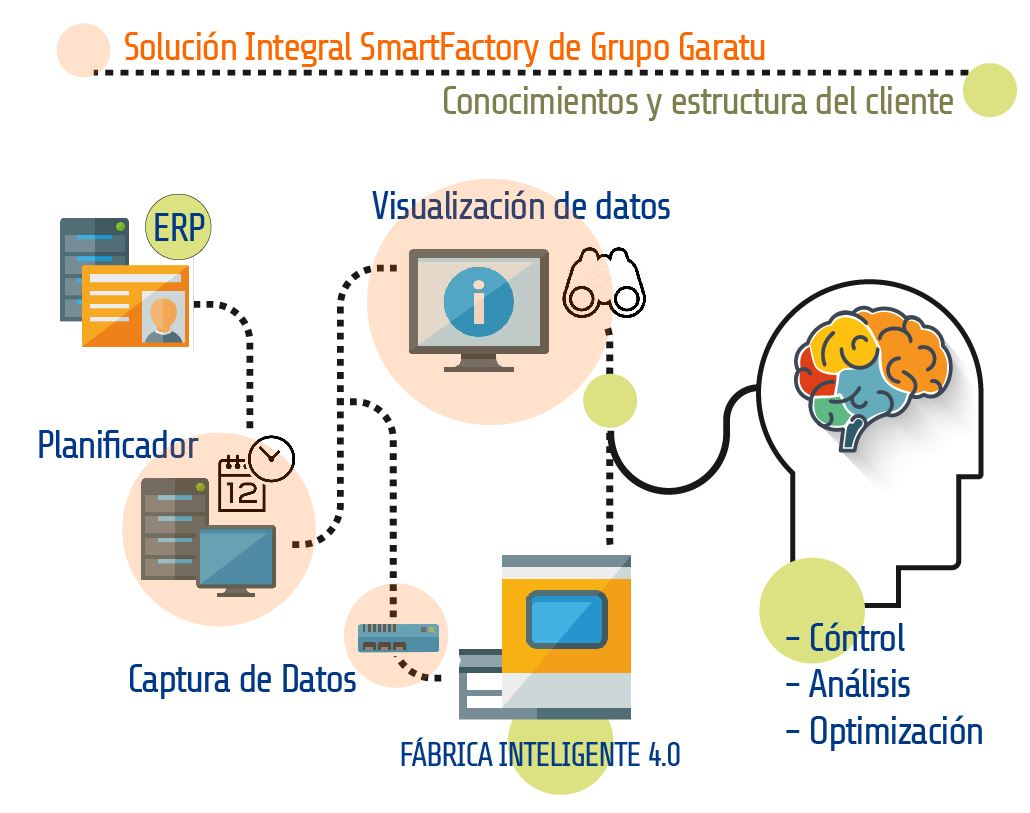

In [26]:
%matplotlib inline


In [38]:
# ============================================================
# ✅ CELDA 1 — Preparación + Carga del CSV + Verificación rápida
# ============================================================

# 1) Importar librerías
import pandas as pd              # Para leer y manipular tablas (CSV) como Dataframe, es como in Excel
import numpy as np               # Para realizar operaciones numéricas
import matplotlib.pyplot as plt  # Para gráficos básico

# 2) Configuración visual

plt.rcParams["figure.figsize"] = (15, 5)  # Tamaño estandar de los gráficos

#------------------------------------------------------------------------------------
# 3) Ruta del archivo
file_path = "manufacturing_6G_dataset.csv"

#---------------------------------------------------------------

# 4) Leer el CSV con Pandas
df = pd.read_csv(file_path)


# 5) Verificación rápida
print("Archivo cargado correctamente.")
print("Tamaño del dataframe (filas, columnas):",df.shape)

# 6) Ver nombres de columnas
print("\n Columnas:")
print(list(df.columns))

# 7) Mostrar las primeras filas
print("\n Primeras 5 filas:")
display(df.head())

# 8) Revisar tipos de datos (deberían ser números: float o int)
print("\n Tipos de datos por columnas:")
print(df.dtypes)

# 9) Revisar si hay valores vacíos (NaN).
print("/n Valores faltates (NaN):")
display(df.isna().sum())



Archivo cargado correctamente.
Tamaño del dataframe (filas, columnas): (100000, 13)

 Columnas:
['Timestamp', 'Machine_ID', 'Operation_Mode', 'Temperature_C', 'Vibration_Hz', 'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_%', 'Quality_Control_Defect_Rate_%', 'Production_Speed_units_per_hr', 'Predictive_Maintenance_Score', 'Error_Rate_%', 'Efficiency_Status']

 Primeras 5 filas:


,Timestamp,Machine_ID,Operation_Mode,Temperature_C,Vibration_Hz,Power_Consumption_kW,Network_Latency_ms,Packet_Loss_%,Quality_Control_Defect_Rate_%,Production_Speed_units_per_hr,Predictive_Maintenance_Score,Error_Rate_%,Efficiency_Status
0,2024-01-01 00:00:00,39,Idle,74.137590,3.500595,8.612162,10.650542,0.207764,7.751261,477.657391,0.344650,14.965470,Low
1,2024-01-01 00:01:00,29,Active,84.264558,3.355928,2.268559,29.111810,2.228464,4.989172,398.174747,0.769848,7.678270,Low
2,2024-01-01 00:02:00,15,Active,44.280102,2.079766,6.144105,18.357292,1.639416,0.456816,108.074959,0.987086,8.198391,Low
3,2024-01-01 00:03:00,43,Active,40.568502,0.298238,4.067825,29.153629,1.161021,4.582974,329.579410,0.983390,2.740847,Medium
4,2024-01-01 00:04:00,8,Idle,75.063817,0.345810,6.225737,34.029191,4.796520,2.287716,159.113525,0.573117,12.100686,Low



 Tipos de datos por columnas:
Timestamp                         object
Machine_ID                         int64
Operation_Mode                    object
Temperature_C                    float64
Vibration_Hz                     float64
Power_Consumption_kW             float64
Network_Latency_ms               float64
Packet_Loss_%                    float64
Quality_Control_Defect_Rate_%    float64
Production_Speed_units_per_hr    float64
Predictive_Maintenance_Score     float64
Error_Rate_%                     float64
Efficiency_Status                 object
dtype: object
/n Valores faltates (NaN):


,0
Timestamp,0
Machine_ID,0
Operation_Mode,0
Temperature_C,0
Vibration_Hz,0
Power_Consumption_kW,0
Network_Latency_ms,0
Packet_Loss_%,0
Quality_Control_Defect_Rate_%,0
Production_Speed_units_per_hr,0


In [39]:
# ============================================================
# ✅ CELDA 2 — Limpieza de datos
# ============================================================

# 1) Verificar duplicados
dup = df.duplicated().sum()
print("Filas duplicadas:", dup)

# Si hay duplicados, eliminarlos (no siempre habrá)
#
df = df.drop_duplicates()

# 2) Asegurar que las columnas numéricas sean realmente numéricas
# Identificar columnas que deberían ser numéricas
numeric_data_cols = [
    'Machine_ID',
    'Temperature_C',
    'Vibration_Hz',
    'Power_Consumption_kW',
    'Network_Latency_ms',
    'Packet_Loss_%',
    'Quality_Control_Defect_Rate_%',
    'Production_Speed_units_per_hr',
    'Predictive_Maintenance_Score',
    'Error_Rate_%'
]

for c in numeric_data_cols:
    # Convertir a numérico, coercing errores a NaN
    df[c] = pd.to_numeric(df[c], errors="coerce")

# 3) Contar NaN antes de eliminar
# Solo contamos y eliminamos de las columnas que deben ser numéricas
print("\nNaN antes de dropna() en columnas numéricas:")
display(df[numeric_data_cols].isna().sum())

# 4) Eliminar filas con NaN en columnas numéricas críticas
# Esto eliminará filas si la conversión a numérico falló y produjo NaN
df = df.dropna(subset=numeric_data_cols).reset_index(drop=True)

print("\nShape después de eliminar duplicados y NaNs en columnas numéricas:", df.shape)
print("\nTipos de datos después de la conversión y limpieza:")
print(df.dtypes)

Filas duplicadas: 0

NaN antes de dropna() en columnas numéricas:


,0
Machine_ID,0
Temperature_C,0
Vibration_Hz,0
Power_Consumption_kW,0
Network_Latency_ms,0
Packet_Loss_%,0
Quality_Control_Defect_Rate_%,0
Production_Speed_units_per_hr,0
Predictive_Maintenance_Score,0
Error_Rate_%,0



Shape después de eliminar duplicados y NaNs en columnas numéricas: (100000, 13)

Tipos de datos después de la conversión y limpieza:
Timestamp                         object
Machine_ID                         int64
Operation_Mode                    object
Temperature_C                    float64
Vibration_Hz                     float64
Power_Consumption_kW             float64
Network_Latency_ms               float64
Packet_Loss_%                    float64
Quality_Control_Defect_Rate_%    float64
Production_Speed_units_per_hr    float64
Predictive_Maintenance_Score     float64
Error_Rate_%                     float64
Efficiency_Status                 object
dtype: object


Los datos simulan lecturas de sensores IoT industriales recolectadas en intervalos de tiempo discretos, típicos de sistemas de monitoreo industrial.

✌ *Número total de registros*

N = número de filas del dataset

Cada fila ≈ una muestra del sistema

In [28]:
# ============================================================
# ✅ 3 CELDA — Crear columna de tiempo (time_step)
# Objetivo: poder graficar variables en función del tiempo.
# Nota: El dataset no especifica frecuencia de muestreo real.
# Se asume un intervalo constante entre muestras (Δt = 1).
# ============================================================

import numpy as np

dt = 1  # intervalo de muestreo (unidad de tiempo arbitraria)

df["sample"] = np.arange(len(df))        # contador de muestras
df["time_step"] = df["sample"] * dt      # eje temporal relativo

print("✅ Columnas agregadas: sample y time_step")
display(df[["sample","time_step"]].head())


✅ Columnas agregadas: sample y time_step


,sample,time_step
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [57]:
# ============================================================
# ✅ CELDA 4 — Escritura: guardar versión limpia
# Esto cubre la parte de "escritura de archivos".
# ============================================================

clean_path = "manufacturing_6G_dataset_clean"
df.to_csv(clean_path, index=False)

print(f"✅ Guardado listo: {clean_path}")
print("Puedes descargarlo desde el panel izquierdo (Files) en Colab.")


✅ Guardado listo: manufacturing_6G_dataset_clean
Puedes descargarlo desde el panel izquierdo (Files) en Colab.


In [25]:
df["Temperature_C"].describe()


,Temperature_C
count,100000.000000
mean,60.041458
std,17.323238
min,30.000138
25%,45.031596
50%,60.033597
75%,74.967217
max,89.998979


0 99999
Filas en el segmento: 101


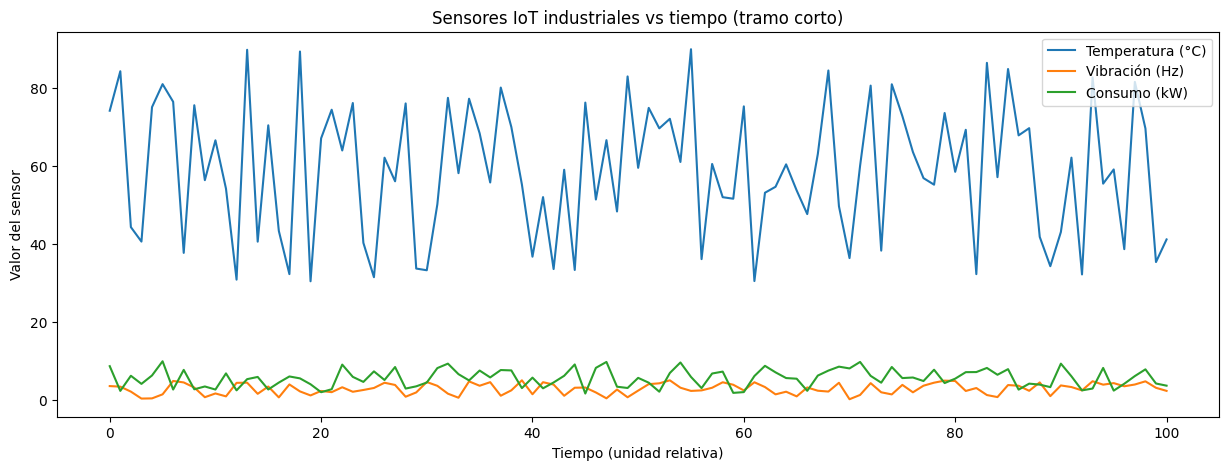

In [37]:
# ============================================================
# ✅ CELDA 5 — Visualización básica (Matplotlib)
# ============================================================

import matplotlib.pyplot as plt   # <-- MUY IMPORTANTE
import numpy as np

# Verificamos rango válido primero
print(df["time_step"].min(), df["time_step"].max())

# Elegimos un tramo seguro
t0, t1 = 0, 100   # usa un tramo pequeño al inicio

seg = df[(df["time_step"] >= t0) & (df["time_step"] <= t1)]

print("Filas en el segmento:", len(seg))

plt.figure()

plt.plot(seg["time_step"], seg["Temperature_C"], label="Temperatura (°C)")
plt.plot(seg["time_step"], seg["Vibration_Hz"], label="Vibración (Hz)")
plt.plot(seg["time_step"], seg["Power_Consumption_kW"], label="Consumo (kW)")

plt.title("Sensores IoT industriales vs tiempo (tramo corto)")
plt.xlabel("Tiempo (unidad relativa)")
plt.ylabel("Valor del sensor")
plt.legend()
plt.show()



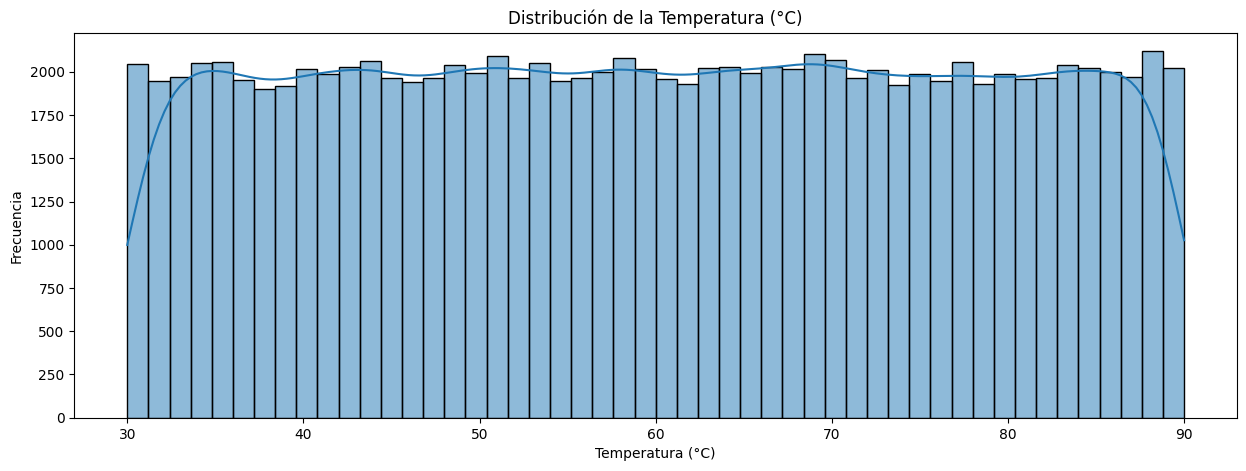

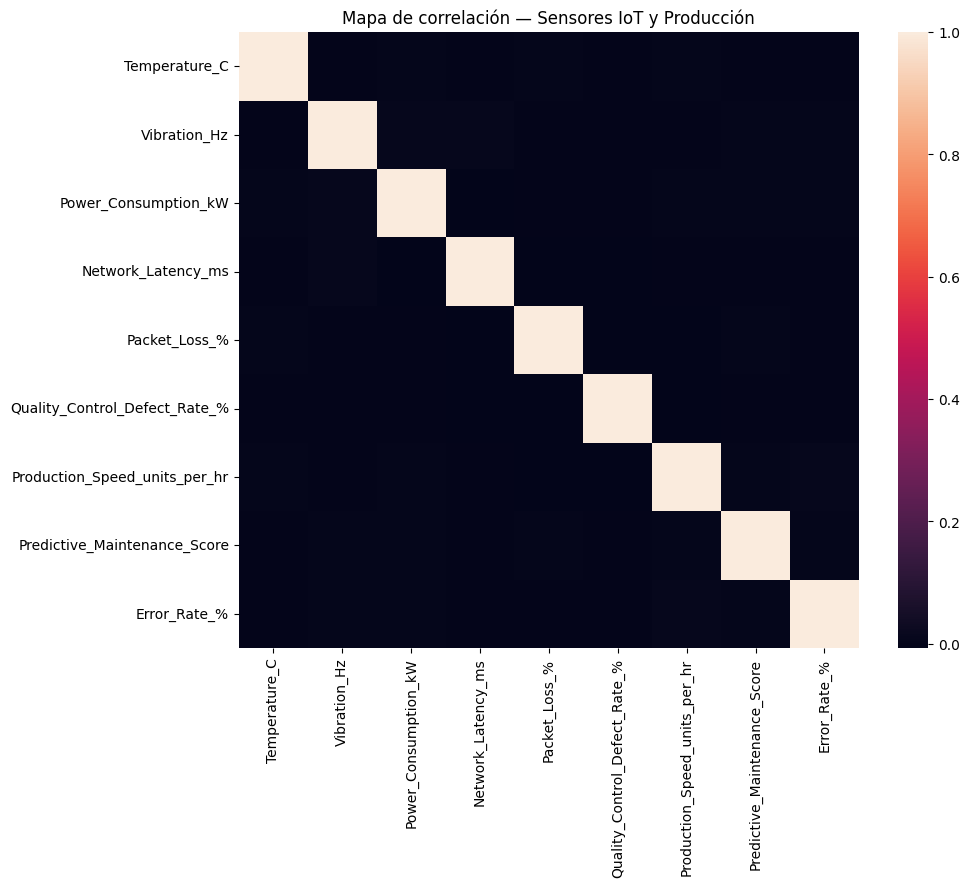

In [30]:
# @title
# ============================================================
# ✅ CELDA 6 — Visualización con Seaborn
# Histograma + mapa de correlación
# ============================================================

import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# Histograma: Temperatura
# -------------------------------

plt.figure()
sns.histplot(df["Temperature_C"], bins=50, kde=True)
plt.title("Distribución de la Temperatura (°C)")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frecuencia")
plt.show()

# -------------------------------
# Mapa de correlación
# -------------------------------

numeric_cols = [
    'Temperature_C',
    'Vibration_Hz',
    'Power_Consumption_kW',
    'Network_Latency_ms',
    'Packet_Loss_%',
    'Quality_Control_Defect_Rate_%',
    'Production_Speed_units_per_hr',
    'Predictive_Maintenance_Score',
    'Error_Rate_%'
]

plt.figure(figsize=(10,8))

corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=False)
plt.title("Mapa de correlación — Sensores IoT y Producción")
plt.show()


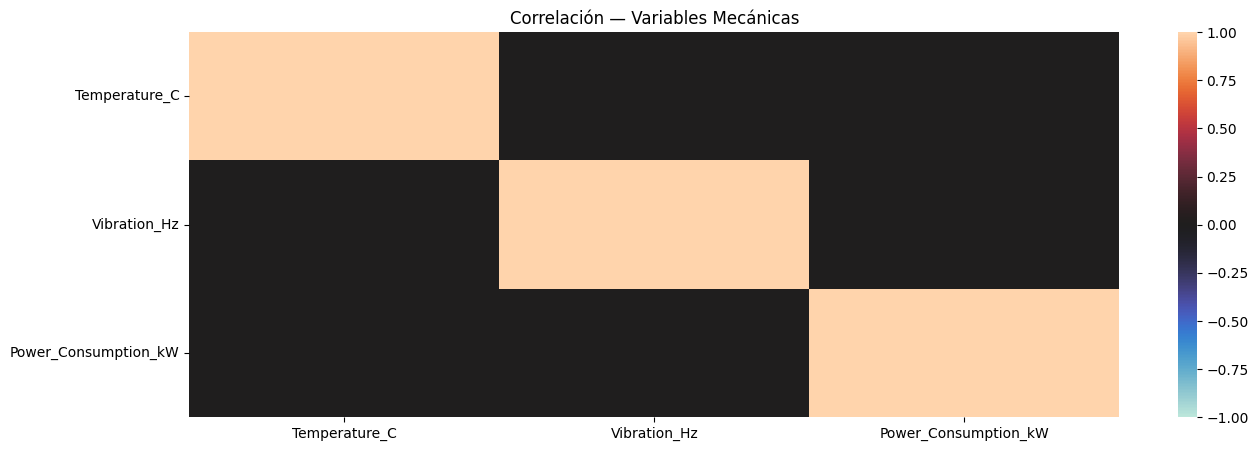

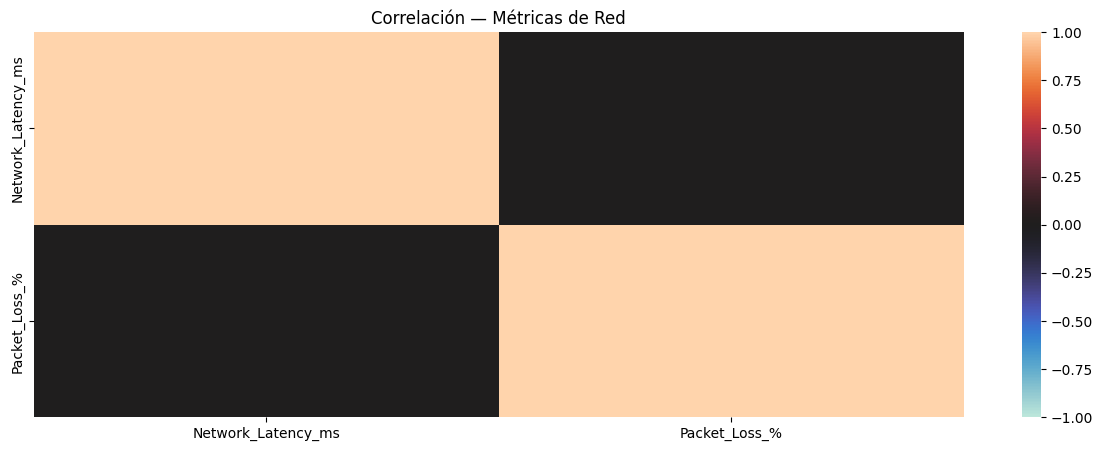

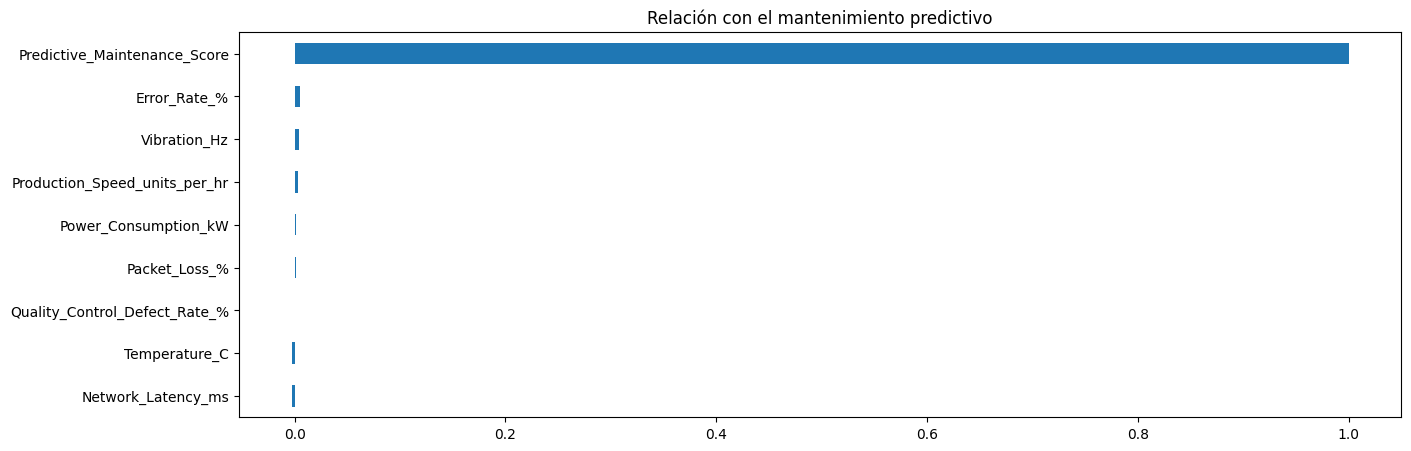

In [41]:
cols_mecanicas = [
    'Temperature_C',
    'Vibration_Hz',
    'Power_Consumption_kW'
]

plt.figure()
sns.heatmap(df[cols_mecanicas].corr(), vmin=-1, vmax=1, center=0)
plt.title("Correlación — Variables Mecánicas")
plt.show()
cols_red = [
    'Network_Latency_ms',
    'Packet_Loss_%'
]

plt.figure()
sns.heatmap(df[cols_red].corr(), vmin=-1, vmax=1, center=0)
plt.title("Correlación — Métricas de Red")
plt.show()
target_corr = df[numeric_cols].corr()["Predictive_Maintenance_Score"].sort_values()

target_corr.plot(kind="barh")
plt.title("Relación con el mantenimiento predictivo")
plt.show()


In [31]:
# ============================================================
# ✅ CELDA — Top 5 correlaciones (|r|) más altas entre variables
# Objetivo: identificar las parejas de variables más relacionadas
# ============================================================

import numpy as np

numeric_cols = [
    'Temperature_C',
    'Vibration_Hz',
    'Power_Consumption_kW',
    'Network_Latency_ms',
    'Packet_Loss_%',
    'Quality_Control_Defect_Rate_%',
    'Production_Speed_units_per_hr',
    'Predictive_Maintenance_Score',
    'Error_Rate_%'
]

# Matriz de correlación (Pearson)
corr = df[numeric_cols].corr(method="pearson")

# Parte superior de la matriz (sin diagonal)
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Convertimos a lista ordenada
pairs = (
    upper.stack()
    .rename("r")
    .reset_index()
    .rename(columns={"level_0":"var1","level_1":"var2"})
)

pairs["abs_r"] = pairs["r"].abs()

# Top 5 correlaciones más altas
top5 = pairs.sort_values("abs_r", ascending=False).head(5)

print("✅ Top 5 correlaciones más altas (por |r|):")
display(top5[["var1","var2","r","abs_r"]])

# Interpretación automática
print("\nInterpretación rápida:")
for _, row in top5.iterrows():
    signo = "positiva" if row["r"] > 0 else "negativa"
    print(f"- {row['var1']} vs {row['var2']}: r={row['r']:.3f} ({signo})")


✅ Top 5 correlaciones más altas (por |r|):


,var1,var2,r,abs_r
9,Vibration_Hz,Network_Latency_ms,0.007546,0.007546
27,Packet_Loss_%,Production_Speed_units_per_hr,-0.007119,0.007119
21,Network_Latency_ms,Packet_Loss_%,-0.006886,0.006886
34,Production_Speed_units_per_hr,Error_Rate_%,0.006070,0.006070
8,Vibration_Hz,Power_Consumption_kW,0.005340,0.005340



Interpretación rápida:
- Vibration_Hz vs Network_Latency_ms: r=0.008 (positiva)
- Packet_Loss_% vs Production_Speed_units_per_hr: r=-0.007 (negativa)
- Network_Latency_ms vs Packet_Loss_%: r=-0.007 (negativa)
- Production_Speed_units_per_hr vs Error_Rate_%: r=0.006 (positiva)
- Vibration_Hz vs Power_Consumption_kW: r=0.005 (positiva)


✅ vibration_rms creada con ventana: 50 muestras


,time_step,Vibration_Hz,vibration_rms
0,0,3.500595,NaN
1,1,3.355928,NaN
2,2,2.079766,NaN
3,3,0.298238,NaN
4,4,0.345810,NaN
5,5,1.385607,NaN
6,6,4.815294,NaN
7,7,4.436610,NaN
8,8,3.128203,NaN
9,9,0.647725,NaN


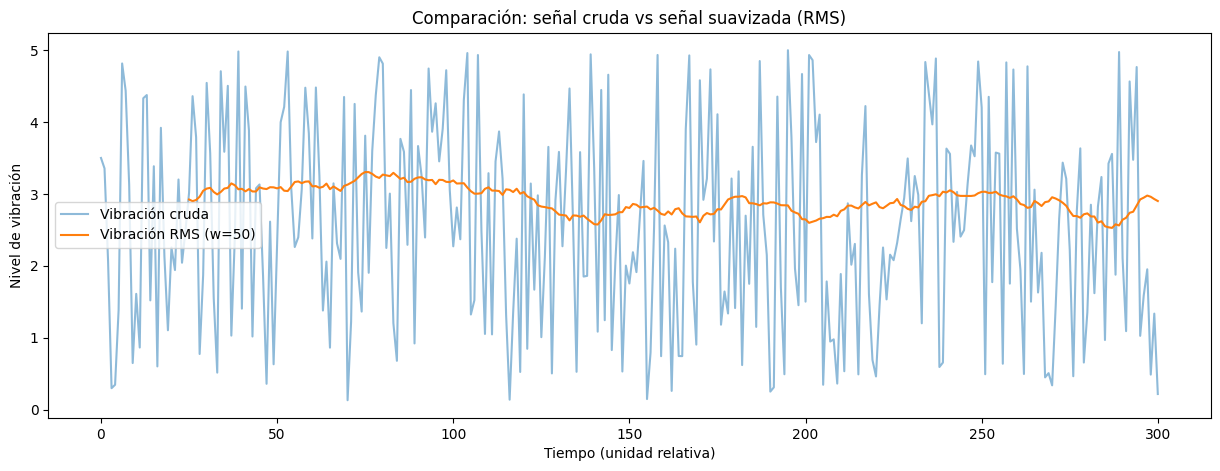

In [32]:
# ============================================================
# ✅ CELDA 8 — Suavizado con Rolling RMS (vibration_rms)
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Parámetros de la ventana
# -------------------------------

# El dataset no tiene frecuencia real -> usamos ventana en muestras
w = 50            # tamaño de ventana (ajustable)
w = max(w, 3)     # seguridad

# -------------------------------
# Rolling RMS: sqrt(mean(x^2))
# -------------------------------

df["vibration_rms"] = np.sqrt(
    (df["Vibration_Hz"]**2)
    .rolling(window=w, center=True)
    .mean()
)

print("✅ vibration_rms creada con ventana:", w, "muestras")

display(df[["time_step", "Vibration_Hz", "vibration_rms"]].head(10))

# -------------------------------
# Comparación visual
# -------------------------------

t0, t1 = 0, 300   # tramo corto
seg = df[(df["time_step"] >= t0) & (df["time_step"] <= t1)]

plt.figure()
plt.plot(seg["time_step"], seg["Vibration_Hz"], label="Vibración cruda", alpha=0.5)
plt.plot(seg["time_step"], seg["vibration_rms"], label=f"Vibración RMS (w={w})")
plt.title("Comparación: señal cruda vs señal suavizada (RMS)")
plt.xlabel("Tiempo (unidad relativa)")
plt.ylabel("Nivel de vibración")
plt.legend()
plt.show()
# NOTA:
# El dataset no incluye frecuencia de muestreo real.
# Se utiliza una ventana fija en número de muestras
# como aproximación para el análisis por ventanas.


🔹 .rolling(window=w, center=True)



* crea una ventana móvil sobre los datos

* usa valores antes y después del punto actual

* evita el desplazamiento temporal

🔹 .mean()

calcula el promedio dentro de la ventana

🔹 np.sqrt(...)

completa la fórmula RMS

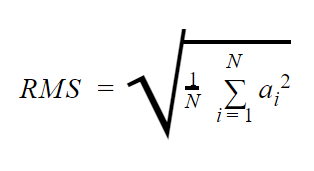
	​

🎯 ¿Para qué sirve el RMS aquí?

El RMS permite medir la energía efectiva de la vibración industrial, eliminando picos aleatorios de ruido y resaltando tendencias reales asociadas a desgaste, carga o anomalías del sistema.

Esto es exactamente lo mismo que en IMU, solo aplicado a Industria 4.0.

,segmento,duracion_muestras,vibration_rms_mean,vibration_rms_std,vibration_rms_mediana,vibration_rms_p95,vibration_rms_max,vibration_max_cruda
0,NORMAL,301,2.917145,0.184117,2.913706,3.223245,3.304710,4.999387
1,SOSPECHOSO,301,2.925440,0.155239,2.932519,3.229330,3.366124,4.986637


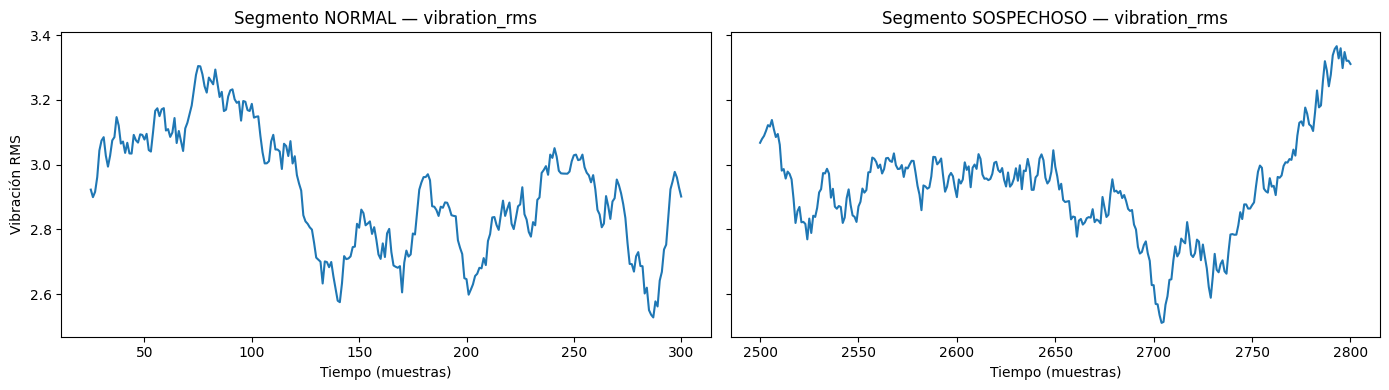

In [33]:
# ============================================================
# ✅ CELDA 9 — Comparación de 2 segmentos (sin ML)
# Fabricación inteligente — Vibración RMS
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt

# 🔧 Ajusta estos rangos según donde veas comportamiento raro
normal_ini, normal_fin = 0, 300
sosp_ini, sosp_fin     = 2500, 2800

normal = df[(df["time_step"] >= normal_ini) & (df["time_step"] <= normal_fin)].copy()
sosp   = df[(df["time_step"] >= sosp_ini) & (df["time_step"] <= sosp_fin)].copy()

# -------------------------------
# Función de resumen estadístico
# -------------------------------

def resumen_segmento(seg, nombre):
    return pd.Series({
        "segmento": nombre,
        "duracion_muestras": len(seg),
        "vibration_rms_mean": seg["vibration_rms"].mean(),
        "vibration_rms_std": seg["vibration_rms"].std(),
        "vibration_rms_mediana": seg["vibration_rms"].median(),
        "vibration_rms_p95": seg["vibration_rms"].quantile(0.95),
        "vibration_rms_max": seg["vibration_rms"].max(),
        "vibration_max_cruda": seg["Vibration_Hz"].max()
    })

tabla = pd.DataFrame([
    resumen_segmento(normal, "NORMAL"),
    resumen_segmento(sosp, "SOSPECHOSO")
])

display(tabla)

# -------------------------------
# Visualización comparativa
# -------------------------------

fig, ax = plt.subplots(1, 2, figsize=(14,4), sharey=True)

ax[0].plot(normal["time_step"], normal["vibration_rms"])
ax[0].set_title("Segmento NORMAL — vibration_rms")
ax[0].set_xlabel("Tiempo (muestras)")
ax[0].set_ylabel("Vibración RMS")

ax[1].plot(sosp["time_step"], sosp["vibration_rms"])
ax[1].set_title("Segmento SOSPECHOSO — vibration_rms")
ax[1].set_xlabel("Tiempo (muestras)")

plt.tight_layout()
plt.show()


In [53]:
# ============================================================
# ✅ CELDA — Umbral basado en baseline normal
# ============================================================

baseline = normal["vibration_rms"].mean()
umbral = baseline * 1.5

print(f"Baseline RMS: {baseline:.3f}")
print(f"Umbral definido: {umbral:.3f}")
baseline = normal["vibration_rms"].mean()
umbral = baseline * 1.5

df["flag_anom"] = (df["vibration_rms"] > umbral).astype(int)


Baseline RMS: 2.917
Umbral definido: 4.376


In [55]:
print(df.columns)
df["vibration_rms"] = np.sqrt(
    (df["Vibration_Hz"]**2)
    .rolling(window=w, center=True)
    .mean()
)
baseline = normal["vibration_rms"].mean()
umbral = baseline * 1.5

df["flag_anom"] = (df["vibration_rms"] > umbral).astype(int)
"vibration_rms" in df.columns
# ============================================================
# ✅ CELDA — Detección binaria de anomalías
# ============================================================

df["flag_anom"] = (df["vibration_rms"] > umbral).astype(int)

kpi = df["flag_anom"].mean() * 100
print(f"% del tiempo fuera de rango: {kpi:.2f}%")


Index(['Timestamp', 'Machine_ID', 'Operation_Mode', 'Temperature_C',
       'Vibration_Hz', 'Power_Consumption_kW', 'Network_Latency_ms',
       'Packet_Loss_%', 'Quality_Control_Defect_Rate_%',
       'Production_Speed_units_per_hr', 'Predictive_Maintenance_Score',
       'Error_Rate_%', 'Efficiency_Status', 'vibration_rms', 'flag_anom'],
      dtype='object')
% del tiempo fuera de rango: 0.00%


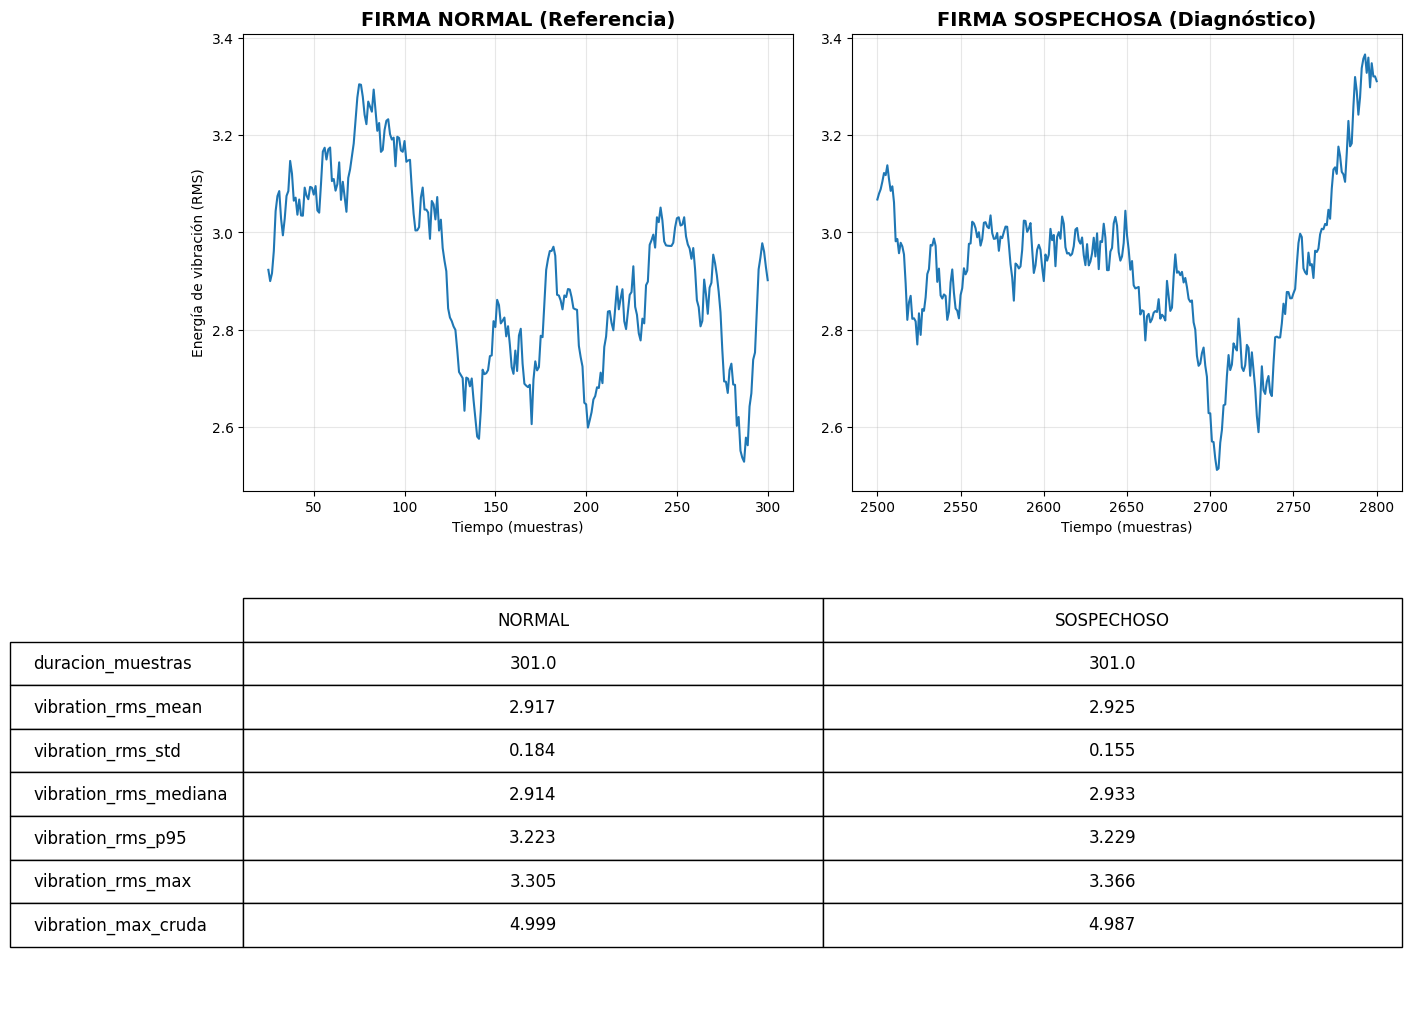

✅ Reporte generado correctamente: evidencia_fabricacion_inteligente.png
📥 Puedes descargar la imagen desde el panel lateral o con clic derecho.


In [34]:
# ============================================================
# ✅ CELDA 10 — Generar Imagen de Evidencia (Reporte Final)
# Fabricación Inteligente — Vibración RMS
# ============================================================

import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. Crear figura tipo reporte (mosaico)
# ------------------------------------------------------------
fig = plt.figure(figsize=(14, 10), constrained_layout=True)
gs = fig.add_gridspec(2, 2)  # 2 filas, 2 columnas

# ------------------------------------------------------------
# 2. Firma NORMAL (arriba izquierda)
# ------------------------------------------------------------
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(normal["time_step"], normal["vibration_rms"])
ax1.set_title("FIRMA NORMAL (Referencia)", fontsize=14, fontweight="bold")
ax1.set_ylabel("Energía de vibración (RMS)")
ax1.set_xlabel("Tiempo (muestras)")
ax1.grid(alpha=0.3)

# ------------------------------------------------------------
# 3. Firma SOSPECHOSA (arriba derecha)
# ------------------------------------------------------------
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
ax2.plot(sosp["time_step"], sosp["vibration_rms"])
ax2.set_title("FIRMA SOSPECHOSA (Diagnóstico)", fontsize=14, fontweight="bold")
ax2.set_xlabel("Tiempo (muestras)")
ax2.grid(alpha=0.3)

# ------------------------------------------------------------
# 4. Tabla comparativa (abajo — ocupa todo)
# ------------------------------------------------------------
ax3 = fig.add_subplot(gs[1, :])
ax3.axis("off")

datos_tabla = tabla.set_index("segmento").T.round(3)

tabla_visual = ax3.table(
    cellText=datos_tabla.values,
    rowLabels=datos_tabla.index,
    colLabels=datos_tabla.columns,
    cellLoc="center",
    loc="center"
)

tabla_visual.set_fontsize(12)
tabla_visual.scale(1, 2)

# ------------------------------------------------------------
# 5. Guardar y mostrar reporte
# ------------------------------------------------------------
nombre_reporte = "evidencia_fabricacion_inteligente.png"
plt.savefig(nombre_reporte, dpi=300)
plt.show()

print(f"✅ Reporte generado correctamente: {nombre_reporte}")
print("📥 Puedes descargar la imagen desde el panel lateral o con clic derecho.")
